In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

In [22]:
# practice pca with example dataset

In [26]:
x = np.array([
    [4, 3], 
    [2, 0], 
    [0, -1], 
    [-1, 1], 
    [-5, -3]
])

In [24]:
# visualize example dataset

In [28]:
min_x0 = min(x[:, 0])
max_x0 = max(x[:, 0])
min_x1 = min(x[:, 1])
max_x1 = max(x[:, 1])

In [31]:
x_axis = {
    "x": [min_x0 - 1, max_x0 + 1], 
    "y": [0, 0]
}
y_axis = {
    "x": [0, 0], 
    "y": [min_x1 - 1, max_x1 + 1]
}

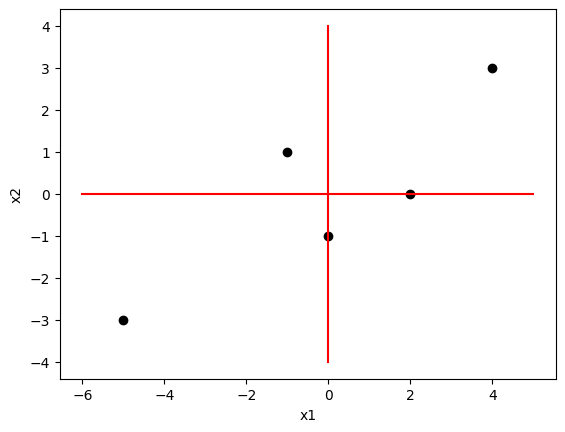

In [144]:
plt.figure()
plt.plot(x_axis["x"], x_axis["y"], color="red")
plt.plot(y_axis["x"], y_axis["y"], color="red")
plt.scatter(x[:, 0], x[:, 1], color="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [35]:
# how can we represent this dataset if we rotate axes?

In [40]:
# if we rotate 10 degree, 
theta = np.radians(10)
c, s = np.cos(theta), np.sin(theta)
r_mat = np.array([
    [c, -s], 
    [s, c]
])

new_x = np.matmul(x, r_mat)
new_x

array([[ 4.46017555,  2.25983055],
       [ 1.96961551, -0.34729636],
       [-0.17364818, -0.98480775],
       [-0.81115958,  1.15845593],
       [-5.4449833 , -2.08618237]])

In [47]:
new_x_axis = {
    "x": np.array([c, -c]), 
    "y": np.array([s, -s])
}
new_y_axis = {
    "x": np.array([-s, s]), 
    "y": np.array([c, -c])
}

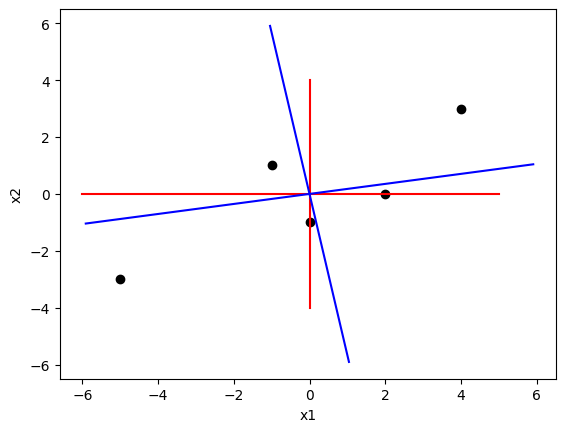

In [145]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], color="black")
plt.plot(x_axis["x"], x_axis["y"], color="red")
plt.plot(y_axis["x"], y_axis["y"], color="red")
plt.plot(6 * new_x_axis["x"], 6 * new_x_axis["y"], color="blue")
plt.plot(6 * new_y_axis["x"], 6 * new_y_axis["y"], color="blue")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [53]:
# plot the result with blue axis

In [54]:
t = np.matmul(x, r_mat)

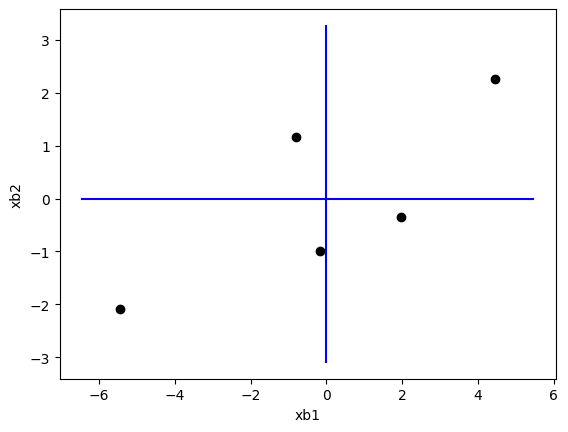

In [146]:
plt.figure()
plt.scatter(t[:, 0], t[:, 1], color="black")
plt.plot([min(t[:, 0]) - 1, max(t[:, 0]) + 1], [0, 0], color="blue")
plt.plot([0, 0], [min(t[:, 1]) - 1, max(t[:, 1]) + 1], color="blue")
plt.xlabel("xb1")
plt.ylabel("xb2")
plt.show()

In [74]:
# calculate sum of squares of data along the original axes

In [83]:
ss_x0 = np.square(x[:, 0]).sum()
ss_x1 = np.square(x[:, 1]).sum()

ss_x = ss_x0 + ss_x1

print(ss_x, "=", ss_x0, "+", ss_x1)

66 = 46 + 20


In [80]:
# calculate sum of squares of data along the blue axes

In [86]:
ss_t0 = np.square(t[:, 0]).sum()
ss_t1 = np.square(t[:, 1]).sum()
ss_t = ss_t0 + ss_t1

print(ss_t, "=", ss_t0, "+", ss_t1)

65.99999999999999 = 54.108527796684186 + 11.891472203315804


In [58]:
# do the same thing with degree 31.7

In [60]:
theta = np.radians(31.7)
c2, s2 = np.cos(theta), np.sin(theta)
r_mat2 = np.array([
    [c2, -s2], 
    [s2, c2]
])

t2 = np.matmul(x, r_mat2)
print(t2)

[[ 4.97965939  0.45054672]
 [ 1.70162222 -1.0509433 ]
 [-0.52547165 -0.85081111]
 [-0.32533946  1.37628276]
 [-5.8304705   0.07492493]]


In [61]:
# plot new axes with original axes.

In [62]:
new_x_axis2 = {
    "x": np.array([c2, -c2]), 
    "y": np.array([s2, -s2])
}
new_y_axis2 = {
    "x": np.array([-s2, s2]), 
    "y": np.array([c2, -c2])
}

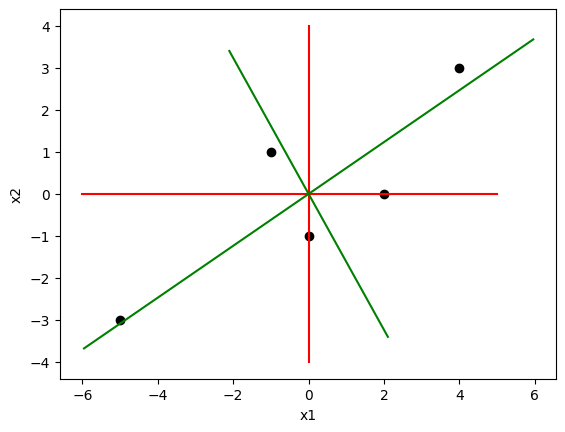

In [147]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], color="black")
plt.plot(x_axis["x"], x_axis["y"], color="red")
plt.plot(y_axis["x"], y_axis["y"], color="red")
plt.plot(7 * new_x_axis2["x"], 7 * new_x_axis2["y"], color="green")
plt.plot(4 * new_y_axis2["x"], 4 * new_y_axis2["y"], color="green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [67]:
# plot the result with green axes

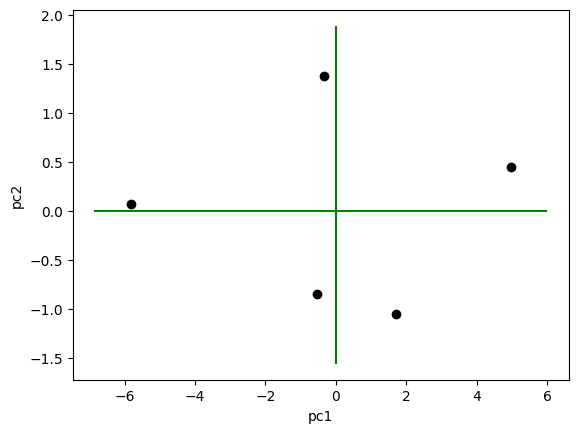

In [148]:
plt.figure()
plt.scatter(t2[:, 0], t2[:, 1], color="black")
plt.plot([min(t2[:, 0]) - 1, max(t2[:, 0]) + 1], [0, 0], color="green")
plt.plot([0, 0], [min(t2[:, 1]) - 0.5, max(t2[:, 1]) + 0.5], color="green")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

In [87]:
# calculate the sum of squares of data along the green axes.

In [89]:
ss_t2_0 = np.square(t2[:, 0]).sum()
ss_t2_1 = np.square(t2[:, 1]).sum()

ss_t2 = ss_t2_0 + ss_t2_1

print(ss_t2, "=", ss_t2_0, "+", ss_t2_1)

66.0 = 62.06887829972757 + 3.931121700272422


In [101]:
print(
    np.matmul(t2.T, t2).round(2).tolist()[0], 
    "\n", 
    np.matmul(t2.T, t2).round(2).tolist()[1]
)

[62.07, 0.02] 
 [0.02, 3.93]


In [111]:
# here, 0.02 is numerical errors.
# They should be zeros (independence or orthogonality)

In [108]:
# calculate eigenvalues and eigenvectors
# and compare them with sum of squares of trasnformed data.

In [103]:
eigen_values, eigen_vectors = np.linalg.eig(np.matmul(x.T, x))

In [107]:
print(eigen_values.round(2))

[62.07  3.93]


In [110]:
# we call 't2' (transformed by principal components that maximize explained variance)
# as principal component scores.

In [ ]:
# the first principal component scores can be calculated 
# as a linear combination of original variables.

In [123]:
# 1st PC
print(t2[:, 0].round(2))

[ 4.98  1.7  -0.53 -0.33 -5.83]


In [124]:
t2_0 = np.matmul(x, r_mat2[:, 0])
print(t2_0.round(2))

[ 4.98  1.7  -0.53 -0.33 -5.83]


In [125]:
# weights used to calculate the first PC scores.

In [127]:
print(r_mat2[:, 0].round(4))

[0.8508 0.5255]


In [128]:
# calculate explained variance if we use only the first principal component.

In [129]:
np.round(100 * eigen_values[0] / ss_x, 2)

94.04

In [131]:
# this can also be decomposed into terms related to original variables.

In [136]:
# variance explained by the 1st PC and related to the first original variable.
print("related to x0:", np.round(eigen_values[0] * r_mat2[0, 0] ** 2, 2))
print("related to x1:", np.round(eigen_values[0] * r_mat2[1, 0] ** 2, 2))

related to x0: 44.93
related to x1: 17.14


In [137]:
print(44.93 + 17.14)

62.07


In [ ]:
# this means that we can consider 94% of variance 
# by considering only the first principal component.

In [90]:
# practice PCA with randomly generated example dataset.

In [3]:
x, y = make_regression(
    n_samples=200, 
    n_features=10, 
    n_informative=3, 
    effective_rank=2
)

In [4]:
pca = PCA(n_components=None, whiten=False)
pca.fit(x)

PCA()

In [1]:
# get principal components (transformation matrix W)

In [5]:
comp = pca.components_
comp.shape

(10, 10)

In [6]:
comp

array([[-0.06524424,  0.58170832,  0.11488863,  0.01947815,  0.13820924,
        -0.45657594, -0.5802979 , -0.18242489, -0.14514265, -0.15851043],
       [ 0.10698521, -0.27708912, -0.25486888, -0.45602269, -0.0978728 ,
         0.25411757, -0.39511664, -0.62227747,  0.12689379, -0.07250984],
       [ 0.52493034,  0.28899576,  0.24368032,  0.21980709,  0.16429718,
         0.26722965,  0.17374988, -0.41678461, -0.19162249,  0.44069431],
       [ 0.4165266 , -0.455828  ,  0.56634488, -0.06649446, -0.19210708,
        -0.45321364,  0.00681478, -0.05524002, -0.05899791, -0.2113575 ],
       [-0.17350523,  0.36559895,  0.20828686, -0.7278439 , -0.13783905,
        -0.09734542,  0.47322261, -0.07866797, -0.05278216,  0.04126985],
       [ 0.59049655,  0.32322159, -0.31433507, -0.03609481, -0.18346163,
         0.14823135,  0.1160857 ,  0.20486611,  0.04456228, -0.57764153],
       [ 0.28528441,  0.08303158, -0.20404488, -0.14963736, -0.41498481,
        -0.24391588, -0.23985279,  0.31167051

In [7]:
x0 = x - pca.mean_

In [8]:
print(np.mean(x0, axis=0))

[ 5.37764278e-19  9.19403442e-19  6.41847686e-19 -1.04083409e-18
  3.70797143e-19 -7.63278329e-19 -2.67147415e-18  3.55618313e-19
 -1.56125113e-18 -7.52436308e-19]


In [2]:
# use three principal components to reduce dimensionality

In [9]:
l = 3
tl = np.matmul(x0, comp[:l, :].T)

In [ ]:
# explained variance (amount)

In [10]:
print(pca.explained_variance_)

[0.00500451 0.00375989 0.00203442 0.00114482 0.00087632 0.00075771
 0.00068939 0.00062231 0.00056424 0.00051073]


In [ ]:
# explained variance (ratio)

In [12]:
print(pca.explained_variance_ratio_)

[0.31348026 0.235518   0.12743542 0.07171089 0.05489217 0.04746278
 0.04318315 0.03898135 0.03534408 0.0319919 ]


In [15]:
print(pca.explained_variance_ / np.sum(pca.explained_variance_))

[0.31348026 0.235518   0.12743542 0.07171089 0.05489217 0.04746278
 0.04318315 0.03898135 0.03534408 0.0319919 ]


In [17]:
np.sum(pca.explained_variance_ratio_)

1.0

In [ ]:
# plot explained variance ratio with varying l (from 1 to 10)

In [18]:
n_feature = x.shape[1]
print(n_feature)

10


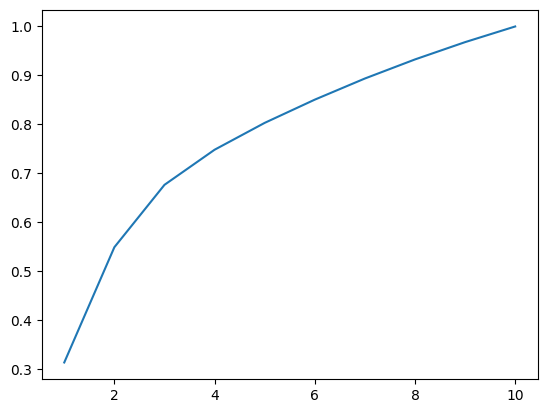

In [19]:
plt.figure()
plt.plot(range(1, n_feature + 1), np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31348026, 0.54899826, 0.67643368, 0.74814456, 0.80303674,
       0.85049951, 0.89368267, 0.93266402, 0.9680081 , 1.        ])

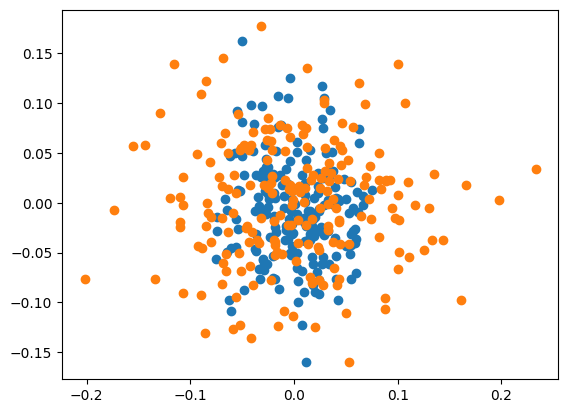

In [21]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(tl[:, 0], tl[:, 1])
plt.show()